In [1]:
%matplotlib inline
from IPython.core.pylabtools import figsize
import pandas as pd
import seaborn as sns
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('proteins_dataframe_final.csv')

In [3]:
#Dropping atypical peptide (only two amino acids in length) that throws off later analysis
df = df.drop(6616)
df

,Unnamed: 0,version,length,mass,modified,sequence_y,DOMAINS_AND_SITES,MOLECULE_PROCESSING,MUTAGENESIS,PTM,...,U,positive_aa,negative_aa,nonpolar_aa,polar_aa,loc,positive_ratio,negative_ratio,polarity_ratio,net_charge
0,Q6ZT89,2,311,33440,2008-03-18,MGSFQLEDFAAGWIGGAASVIVGHPLDTVKTRLQAGVGYGNTLSCI...,3.0,1.0,0.0,0.0,...,NaN,30.0,20.0,191.0,70.0,mitochondria,0.096463,0.064309,2.728571,10.0
1,O75380,1,124,13712,1998-11-01,MAAAMTFCRLLNRCGEAARSLPLGARCFGVRVSPTGEKVTHTGQVY...,0.0,2.0,0.0,1.0,...,NaN,22.0,14.0,64.0,24.0,mitochondria,0.177419,0.112903,2.666667,8.0
2,Q9P0J6,1,103,11784,2000-10-01,MANLFIRKMVNPLLYLSRHTVKPRALSTFLFGSIRGAAPVAVEPGA...,0.0,2.0,0.0,0.0,...,NaN,25.0,2.0,58.0,18.0,mitochondria,0.242718,0.019417,3.222222,23.0
3,P17540,2,419,47504,2006-10-17,MASIFSKLLTGRNASLLFATMGTSVLTTGYLLNRQKVCAEVREQPR...,9.0,2.0,0.0,2.0,...,NaN,68.0,55.0,209.0,87.0,mitochondria,0.162291,0.131265,2.402299,13.0
4,P38646,2,679,73680,2002-05-27,MISASRAAAARLVGAAASRGPTAARHQDSWNGLSHEAFRLVSRRDY...,2.0,2.0,1.0,26.0,...,NaN,96.0,95.0,332.0,156.0,mitochondria,0.141384,0.139912,2.128205,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12181,P10124,3,158,17652,2009-11-24,MMQKLLKCSRLVLALALILVLESSVQGYPTRRARYQWVRCNPDSNS...,10.0,2.0,0.0,9.0,...,NaN,18.0,23.0,75.0,42.0,golgi,0.113924,0.145570,1.785714,-5.0
12182,O43264,3,779,88829,2007-01-23,MASFVTEVLAHSGRLEKEDLGTRISRLTRRVEEIKGEVCNMISKKY...,3.0,2.0,0.0,4.0,...,NaN,111.0,105.0,364.0,199.0,golgi,0.142490,0.134788,1.829146,6.0
12183,Q24JP5,1,1023,110110,2006-04-18,MCARMAGRTTAAPRGPYGPWLCLLVALALDVVRVDCGQAPLDPVYL...,2.0,2.0,0.0,2.0,...,NaN,122.0,126.0,591.0,184.0,golgi,0.119257,0.123167,3.211957,-4.0
12184,Q9Y296,1,219,24340,1999-11-01,MAIFSVYVVNKAGGLIYQLDSYAPRAEAEKTFSYPLDLLLKLHDER...,0.0,1.0,0.0,0.0,...,NaN,26.0,25.0,119.0,49.0,golgi,0.118721,0.114155,2.428571,1.0


In [4]:
#Grouping datasets by localization for analysis
mitochondria = df.groupby('loc').get_group('mitochondria')
cytoplasm = df.groupby('loc').get_group('cytoplasm')
er = df.groupby('loc').get_group('endoplasmic_reticulum')
endosome = df.groupby('loc').get_group('endosome')
golgi = df.groupby('loc').get_group('golgi')
membrane = df.groupby('loc').get_group('membrane')
nucleus = df.groupby('loc').get_group('nucleus')
rough_er = df.groupby('loc').get_group('rough_er')
vesicle = df.groupby('loc').get_group('vesicle')

localizations_str = ['mitochondria','cytoplasm','er','endosome','golgi','membrane','nucleus','rough_er','vesicle']
localizations = [mitochondria,cytoplasm,er,endosome,golgi,membrane,nucleus,rough_er,vesicle]

## Protein Discovery Over The Years

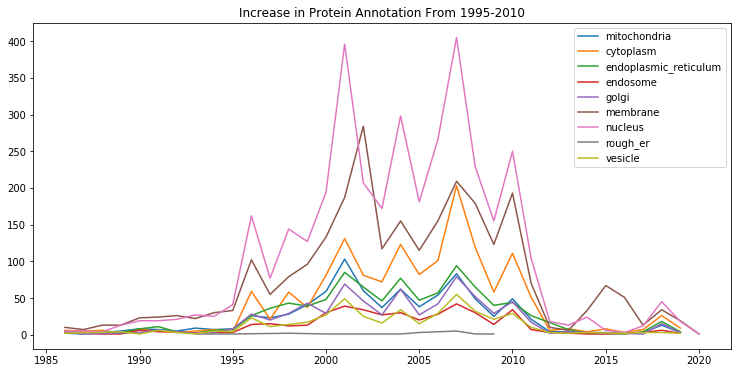

In [5]:
figsize(12.5,6)

for local in localizations:
    count = pd.to_datetime(local['date']).dt.year.value_counts()
    _ = sns.lineplot(data=count, label=local['loc'][-1:].values[0])
    
_ = plt.title('Increase in Protein Annotation From 1995-2010')

These data suggest that there was a significant increase in annotated proteins on UniProt from 1995 into the early 2010's. This could be for many reasons: increased internet use, technological breakthroughs making it cheaper or easier to characterize proteins, more resources being devoted to protein validation by the database, etc. <br>
<br>
The dropoff in characterization begining in the early 2010's is also interesting. It is unclear whether this is due to saturation in characterized proteins already in the database, or some other factor.

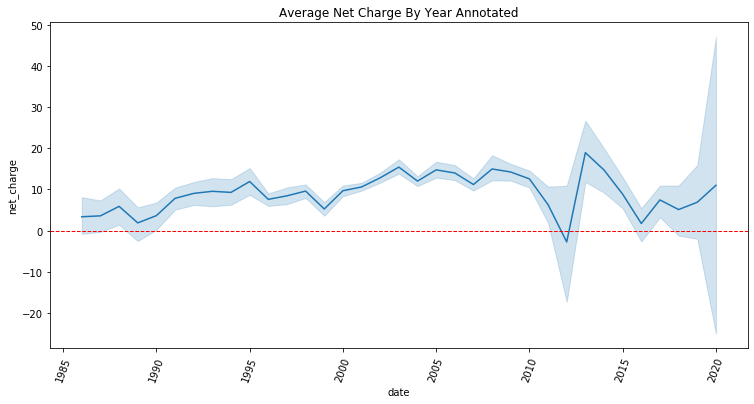

In [6]:
_ = sns.lineplot(x=pd.to_datetime(df['date']).dt.year,y=df['net_charge'])
_ = plt.axhline(y=0, color='red', linestyle='--', lw=1)
_ = plt.xticks(rotation=70)
_ = plt.title('Average Net Charge By Year Annotated')

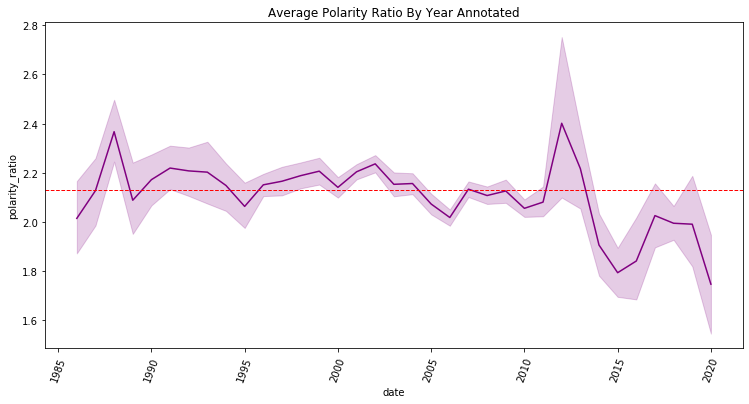

In [7]:
_ = sns.lineplot(x=pd.to_datetime(df['date']).dt.year,y=df['polarity_ratio'], color='purple')
_ = plt.axhline(y=np.mean(df.polarity_ratio), color='red', linestyle='--', lw=1)
_ = plt.xticks(rotation=70)
_ = plt.title('Average Polarity Ratio By Year Annotated')

These two graphs represent the average net charge, and average polarity ratio of proteins discovered by year. Both graphs show increased fluctuations starting in the 2010's. It is likely that this is partially because of the decreased samples sizes starting in these eras, but this may also represent a trend where charged and polar proteins represent a higher proportion of later discoveries because they are more difficult to isolate.

## Net Charge

Given that the net charge of a protein significantly affects its physical properties, the effects of net charge in relation to protein localization was investigated.

In [8]:
charge_means = {}

for local in localizations:
    mean = np.mean(local.net_charge)
    localization = local['loc'][-1:].values[0]
    charge_means.update({localization:mean})
    
charge_means

{'mitochondria': 12.129716981132075,
 'cytoplasm': 8.309476474486415,
 'endoplasmic_reticulum': 10.826133909287257,
 'endosome': 5.866666666666666,
 'golgi': 8.59656652360515,
 'membrane': 9.65835504279866,
 'nucleus': 15.722463374932175,
 'rough_er': 13.166666666666666,
 'vesicle': 7.011086474501108}

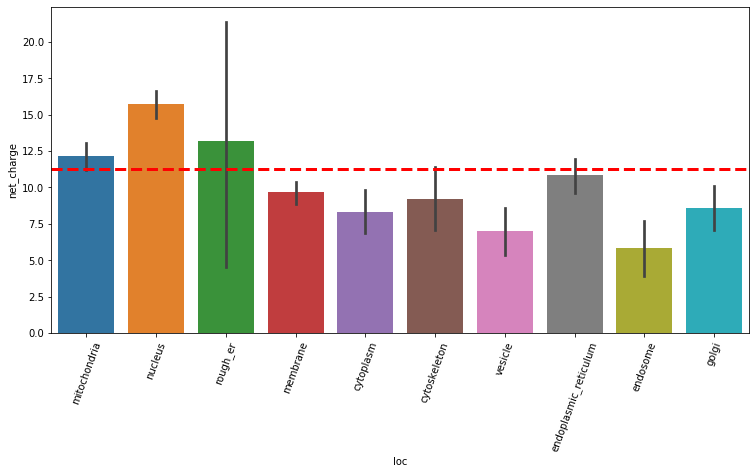

In [9]:
_ = sns.barplot(x='loc', y='net_charge', data=df)
_ = plt.xticks(rotation=70)
_ = plt.axhline(y=np.mean(df.net_charge), color='red', linestyle='--', lw=3)

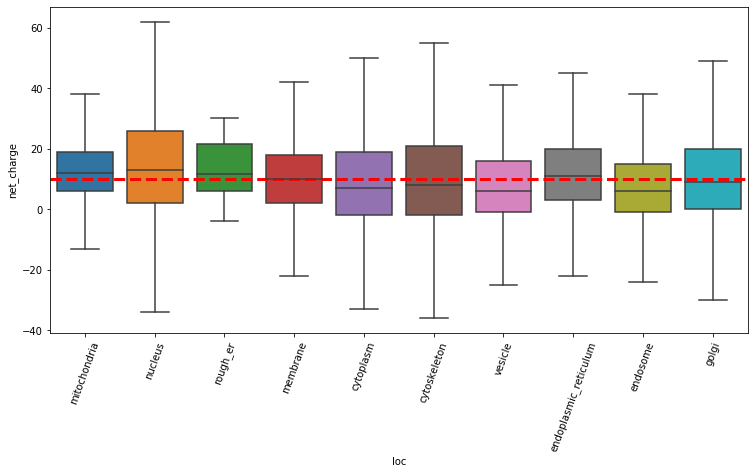

In [10]:
_ = sns.boxplot(x='loc', y='net_charge', showfliers=False, data=df)
_ = plt.axhline(y=np.median(df.net_charge), color='red', linestyle='--', lw=3)
_ = plt.xticks(rotation=70)

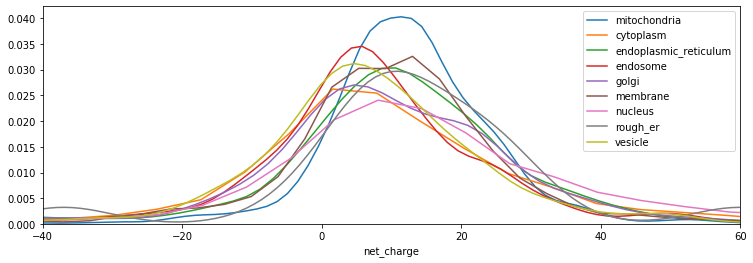

In [11]:
#_ = sns.distplot(mitochondria.net_charge)
figsize(12.5,4)
for local in localizations:
    _ = sns.distplot(local.net_charge, hist=False, label=local['loc'][-1:].values[0])
    _ = plt.xlim([-40,60])

**Conclusion:** Proteins that localize to mitochondria and the nucleus have a higher net charge on average. Additionally proteins that localize to the golgi apparatus, cell membrane, and rough endoplasmic reticulum have a higher proportion of high charge proteins.

## Polarity Ratio

In [12]:
polarity_means = {}

for local in localizations:
    mean = np.mean(local.polarity_ratio)
    localization = local['loc'][-1:].values[0]
    polarity_means.update({localization:mean})
    
polarity_means

{'mitochondria': 2.435289208032323,
 'cytoplasm': 2.019325813821777,
 'endoplasmic_reticulum': 2.3185972042499277,
 'endosome': 2.161458986996622,
 'golgi': 2.1889309996282167,
 'membrane': 2.223298401342456,
 'nucleus': 2.020203692102531,
 'rough_er': 2.4353243415446673,
 'vesicle': 2.121077933092304}

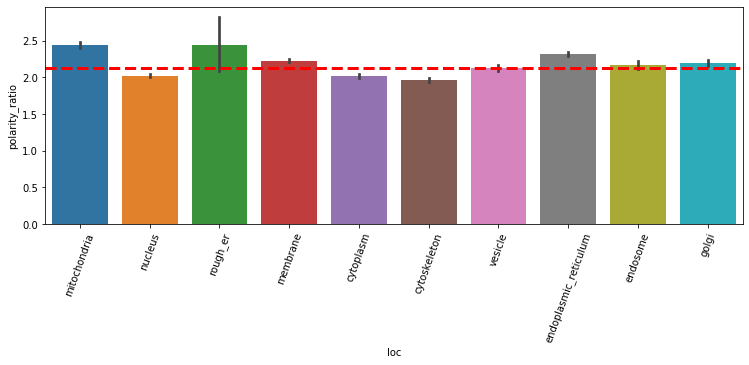

In [13]:
_ = sns.barplot(x='loc', y='polarity_ratio', data=df)
_ = plt.xticks(rotation=70)
_ = plt.axhline(y=np.mean(df.polarity_ratio), color='red', linestyle='--', lw=3)

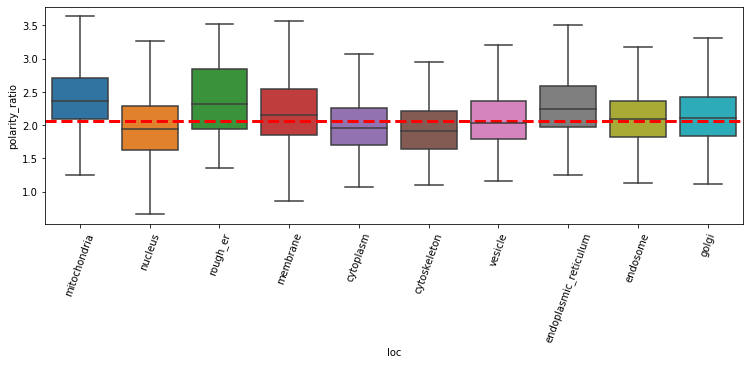

In [14]:
_ = sns.boxplot(x='loc', y='polarity_ratio', showfliers=False, data=df)
_ = plt.axhline(y=np.median(df.polarity_ratio), color='red', linestyle='--', lw=3)
_ = plt.xticks(rotation=70)

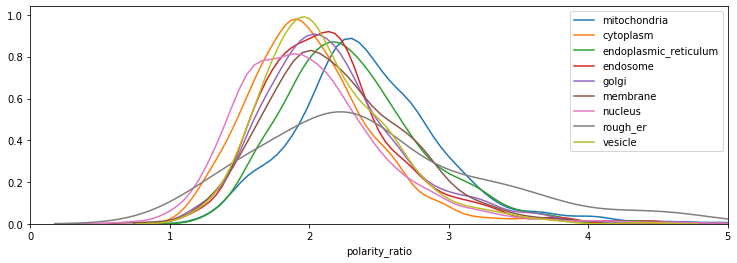

In [15]:
figsize(12.5,4)
for local in localizations:
    _ = sns.distplot(local.polarity_ratio, hist=False, label=local['loc'][-1:].values[0])
    _ = plt.xlim([0,5])

**Conclusion:** Membrane and mitochondrial proteins have a higher polarity ratio on average. 

## Correlation Analysis

Pearson's correlation values were calculated between net charge or polarity ratio and many other possibly interesting parameters. The columns listed below were selected for analysis because of their possible relationships with the chosen parameter.

In [16]:
# To look at correlation, subset data to columns that may have interesting correlation with net charge.
peptide_info = ['length','mass','PTM','STRUCTURAL','BINDING','CHAIN','CARBOHYD','CROSSLNK','DISULFID','LIPID','METAL','TRANSMEM','positive_aa','negative_aa','nonpolar_aa','polar_aa','positive_ratio','negative_ratio','polarity_ratio','net_charge']

mito_correlation = mitochondria[peptide_info].corr(method='pearson').net_charge
charge_correlations = pd.DataFrame({str(mitochondria['loc'][-1:].values[0]):mito_correlation})

for location in localizations:
    correlations = location[peptide_info].corr(method='pearson').net_charge
    localization = location['loc'][-1:].values[0]
    corr_df = pd.DataFrame({localization:correlations})
    #corr_df = corr_df.reset_index()
    charge_correlations = charge_correlations.merge(corr_df,left_index=True, right_index=True)
    
charge_correlations = charge_correlations.drop('mitochondria_y', axis=1)
charge_correlations[charge_correlations > 0.25]

,mitochondria_x,cytoplasm,endoplasmic_reticulum,endosome,golgi,membrane,nucleus,rough_er,vesicle
length,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mass,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PTM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
STRUCTURAL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BINDING,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CHAIN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CARBOHYD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CROSSLNK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.575780,NaN
DISULFID,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LIPID,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
mito_correlation = mitochondria[peptide_info].corr(method='pearson').polarity_ratio
polarity_correlations = pd.DataFrame({str(mitochondria['loc'][-1:].values[0]):mito_correlation})

for location in localizations:
    correlations = location[peptide_info].corr(method='pearson').polarity_ratio
    localization = location['loc'][-1:].values[0]
    corr_df = pd.DataFrame({localization:correlations})
    #corr_df = corr_df.reset_index()
    polarity_correlations = polarity_correlations.merge(corr_df,left_index=True, right_index=True)
    
polarity_correlations = polarity_correlations.drop('mitochondria_y', axis=1)
polarity_correlations[polarity_correlations > 0.2]

,mitochondria_x,cytoplasm,endoplasmic_reticulum,endosome,golgi,membrane,nucleus,rough_er,vesicle
length,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mass,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PTM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
STRUCTURAL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BINDING,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CHAIN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CARBOHYD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CROSSLNK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.225541,NaN
DISULFID,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LIPID,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


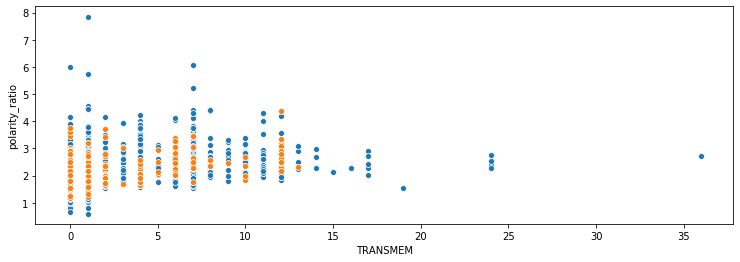

In [18]:
_ = sns.scatterplot(x='TRANSMEM',y='polarity_ratio', data=membrane)
_ = sns.scatterplot(x='TRANSMEM',y='polarity_ratio', data=vesicle)

**Conclusion:** Positive correlations are observed between polarity ratio and transmembrane domains in proteins that localize to membranes within a cell.

## Number of Transmembrane Domains

As a check of the data, the number of transmembrane domains in a peptide were assessed in relation to its localization. If the dataset is accurate, proteins that are associated with membranes (cell membrane, vesicle, endoplasic reticulum, endosomes, and golgi) should have more transmembrane domains per peptide.

In [19]:
transmembrane_means = {}

for local in localizations:
    mean = np.mean(local.TRANSMEM)
    localization = local['loc'][-1:].values[0]
    transmembrane_means.update({localization:mean})
    
transmembrane_means

{'mitochondria': 0.8903301886792453,
 'cytoplasm': 0.16235917826375082,
 'endoplasmic_reticulum': 2.302375809935205,
 'endosome': 1.5908045977011493,
 'golgi': 1.4277539341917025,
 'membrane': 3.2649795310755487,
 'nucleus': 0.10119370591427021,
 'rough_er': 0.6666666666666666,
 'vesicle': 1.4212860310421287}

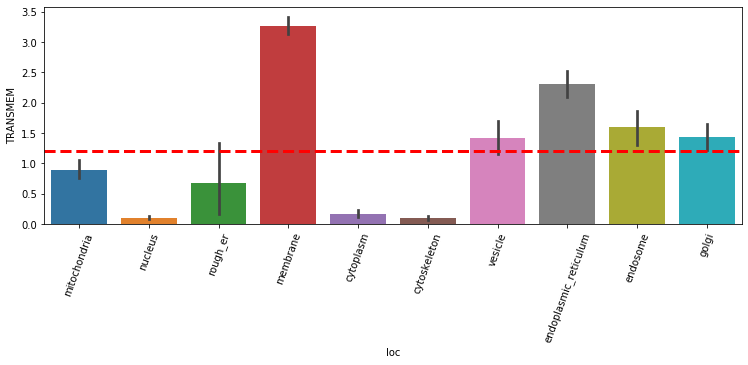

In [20]:
_ = sns.barplot(x='loc', y='TRANSMEM', data=df)
_ = plt.xticks(rotation=70)
_ = plt.axhline(y=np.mean(df.TRANSMEM), color='red', linestyle='--', lw=3)

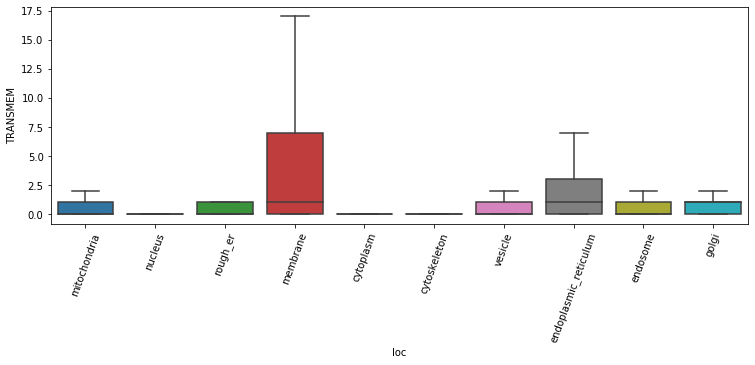

In [21]:
_ = sns.boxplot(x='loc', y='TRANSMEM', showfliers=False, data=df)
#_ = plt.axhline(y=np.median(df.TRANSMEM), color='red', linestyle='--', lw=3)
_ = plt.xticks(rotation=70)

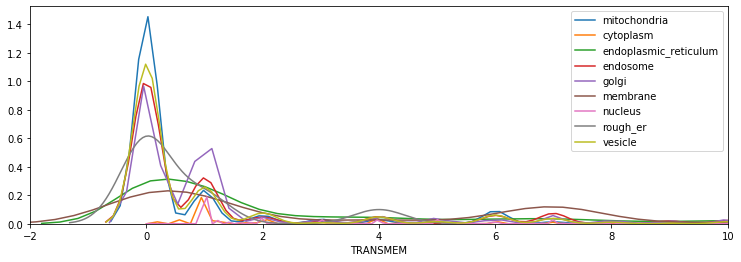

In [22]:
figsize(12.5,4)
for local in localizations:
    _ = sns.distplot(local.TRANSMEM, hist=False, label=local['loc'][-1:].values[0])
    _ = plt.xlim([-2,10])

**Conclusion:** The data look good! Transmembrane domains are enriched in membrane associated localizations.